<a href="https://colab.research.google.com/github/Rufidatul726/5th-Semeter/blob/main/DBMSII/KMeans/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import csv
import random
import math

In [10]:
def load_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile)
        data = []
        for row in datareader:
            
            data.append([float(x) for x in row])
    return data

In [11]:
def euclidean_distance(x, y):
    distance = 0.0
    for i in range(len(x)):
        distance += (x[i] - y[i]) ** 2
    return math.sqrt(distance)


In [12]:
def initialize_centroids(data, k):
    centroids = random.sample(data, k)
    return centroids

In [13]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid_idx = distances.index(min(distances))
        clusters[closest_centroid_idx].append(point)
    return clusters

In [16]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_size = len(cluster)
        if cluster_size == 0:
            continue
        sum_coords = [sum(coords) for coords in zip(*cluster)]
        centroid = [coord / cluster_size for coord in sum_coords]
        centroids.append(centroid)
    return centroids


In [14]:
def k_means(data, k, max_iterations):
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if centroids == new_centroids:
            break
        centroids = new_centroids
    return centroids, clusters

In [18]:
import matplotlib.pyplot as plt

def plot_clusters(clusters, centroids):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, cluster in enumerate(clusters):
        color = colors[i % len(colors)]
        x_coords = [point[0] for point in cluster]
        y_coords = [point[1] for point in cluster]
        plt.scatter(x_coords, y_coords, c=color)
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=200, linewidths=3, c='k')
    plt.show()


Final centroids: [[5.9, 7.6], [8.1, 6.8999999999999995], [2.3, 3.9499999999999997]]
Final clusters: [[[5.6, 6.7], [5.5, 7.8], [6.5, 8.9], [6.0, 7.0]], [[6.7, 5.6], [8.9, 9.0], [9.5, 8.2], [7.1, 6.5], [9.0, 7.5], [8.5, 6.0], [7.0, 5.5]], [[1.2, 3.4], [2.0, 4.5], [3.2, 2.3], [2.8, 5.6]]]


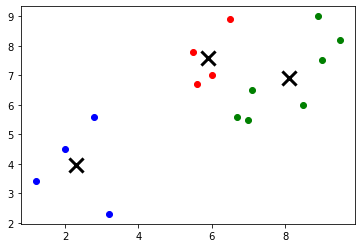

In [19]:
if __name__ == '__main__':
    data = load_data('/content/data.csv')
    k = 3
    max_iterations = 100
    centroids, clusters = k_means(data, k, max_iterations)
    print('Final centroids:', centroids)
    print('Final clusters:', clusters)
    plot_clusters(clusters, centroids)